# W11-H22

1. Using the imported libraries, plot the distribution of three variables of choice for the breast cancer dataset. Discuss the normality of the distribution and explain if the data needs any transformation.

2. Among the variables, what looks like the most defining variable for benign cancer vs malignant cancer? How would you observe/test that?

3. What is the relationship between target and mean radius of the tumor? Hint: boxplot

4. Build a logistic regression model of your own using other features in this dataset, such as the mean texture and mean symmetry. 

5. Bonus question: Why should we choose mean or median values for when we replace missing values in a dataset? Or what else can we do to address the missing values in a dataset? (2 points)


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

In [5]:
from sklearn import datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_breast_cancer())

In [7]:
sub_df = df[['mean radius','mean smoothness','mean compactness']]

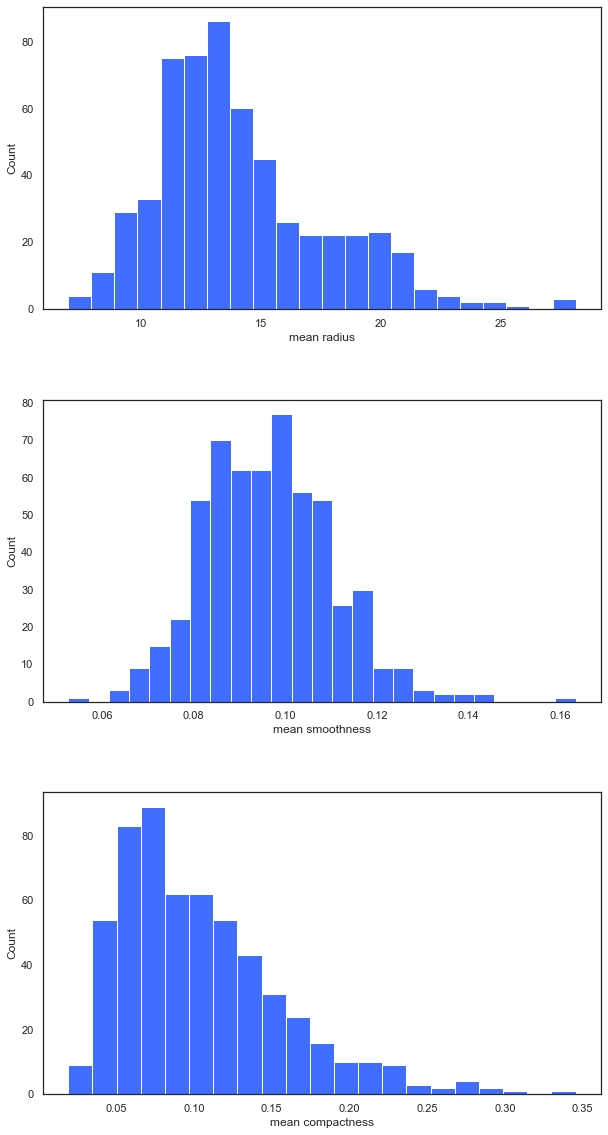

In [25]:
feature_names = [cname for cname in sub_df.iloc[:,:].columns]
rcParams['figure.figsize'] = 10,20
sns.set(font_scale = 1)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.3)
i = 1;
for name in feature_names:
    plt.subplot(3,1,i)
    sns.histplot(data=sub_df, x=name,palette="YlGnBu")
    i = i + 1

Answer 1\
The "mean smoothness" has normal distribution whereas "mean radius" and "mean compactness" skew to right. In the situation, I might transform the "mean radius" and "mean compactness" by power transforms.

Answer 2\
The "mean radius" is the most defining variable for malignant and benign cancer. Like we did in the class, by generating the correlation matrix and visualizing it with heatmap, I can check the degree of the correlation between the features and the target, so I can confirm whether the "mean radius" is the most defining variable or not.

Answer 3\
From the heatmap which we are generated in the class, I can check the correlation score between "mean radius" and "target". The correlation score was - 0.73. The score tells they are negtively and highly correlated.

Answer 4

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [6]:
dict = {0:'malignant',1:'benign'}
df['target'] = df['target'].replace(dict)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['mean symmetry']], df['target'], random_state=0)

In [8]:
# Standardize the dataset’s features
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:

clf = LogisticRegression()

# Training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.6784037558685446


In [11]:
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

probability [[0.42272508 0.57727492]]


In [13]:
y_pred = clf.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 49


In [14]:
X_test.shape

(143, 1)

In [17]:
Error = 49/143
print('Error Percentage : {}'.format(Error))

Error Percentage : 0.34265734265734266


Answer 5\
We have to replace the missing values with mean or median when there are high percentages of missing values presented in the features. The high percentage of the missing values are negatively impact on the model to produce bias.\
If we have a big size of a dataset and there are not much of missing values in the datset, then we can drop those data points contains the missing values as well.